In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# datatypes that must be cast as strings
types = {'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID': 'str',
 'Charity_Indicator': 'str',
 'City_of_Travel': 'str',
 'Contextual_Information': 'str',
 'Country_of_Travel': 'str',
 'NDC_of_Associated_Covered_Drug_or_Biological1': 'str',
 'NDC_of_Associated_Covered_Drug_or_Biological2': 'str',
 'NDC_of_Associated_Covered_Drug_or_Biological3': 'str',
 'NDC_of_Associated_Covered_Drug_or_Biological4': 'str',
 'NDC_of_Associated_Covered_Drug_or_Biological5': 'str',
 'Name_of_Associated_Covered_Device_or_Medical_Supply1': 'str',
 'Name_of_Associated_Covered_Device_or_Medical_Supply2': 'str',
 'Name_of_Associated_Covered_Device_or_Medical_Supply3': 'str',
 'Name_of_Associated_Covered_Device_or_Medical_Supply4': 'str',
 'Name_of_Associated_Covered_Device_or_Medical_Supply5': 'str',
 'Name_of_Associated_Covered_Drug_or_Biological1': 'str',
 'Name_of_Associated_Covered_Drug_or_Biological2': 'str',
 'Name_of_Associated_Covered_Drug_or_Biological3': 'str',
 'Name_of_Associated_Covered_Drug_or_Biological4': 'str',
 'Name_of_Associated_Covered_Drug_or_Biological5': 'str',
 'Name_of_Third_Party_Entity_Receiving_Payment_or_Transfer_of_Value': 'str',
 'Physician_License_State_code2': 'str',
 'Physician_License_State_code3': 'str',
 'Physician_License_State_code4': 'str',
 'Physician_License_State_code5': 'str',
 'Physician_Name_Suffix': 'str',
 'Physician_Profile_ID': 'str',
 'Recipient_Postal_Code': 'str',
 'Recipient_Primary_Business_Street_Address_Line2': 'str',
 'Recipient_Province': 'str',
 'Recipient_Zip_Code': 'str',
 'Record_ID': 'str',
 'State_of_Travel': 'str',
 'Teaching_Hospital_ID': 'str',
 'Teaching_Hospital_Name': 'str',
 'Third_Party_Equals_Covered_Recipient_Indicator': 'str'}

In [3]:
# fast date conversion 
# credit: http://stackoverflow.com/questions/29882573/pandas-slow-date-conversion
def lookup(s):
    """
    This is an extremely fast approach to datetime parsing.
    For large data, the same dates are often repeated. Rather than
    re-parse these, we store all unique dates, parse them, and
    use a lookup to convert all dates.
    """
    dates = {date:pd.to_datetime(date) for date in s.unique()}
    return s.map(dates)

In [4]:
# read in the data
df = pd.read_csv(r'data_unzipped/payments_14/OP_DTL_GNRL_PGYR2014_P06302016.csv', dtype=types)
df.head()

,Change_Type,Covered_Recipient_Type,Teaching_Hospital_CCN,Teaching_Hospital_ID,Teaching_Hospital_Name,Physician_Profile_ID,Physician_First_Name,Physician_Middle_Name,Physician_Last_Name,Physician_Name_Suffix,...,NDC_of_Associated_Covered_Drug_or_Biological3,NDC_of_Associated_Covered_Drug_or_Biological4,NDC_of_Associated_Covered_Drug_or_Biological5,Name_of_Associated_Covered_Device_or_Medical_Supply1,Name_of_Associated_Covered_Device_or_Medical_Supply2,Name_of_Associated_Covered_Device_or_Medical_Supply3,Name_of_Associated_Covered_Device_or_Medical_Supply4,Name_of_Associated_Covered_Device_or_Medical_Supply5,Program_Year,Payment_Publication_Date
0,UNCHANGED,Covered Recipient Physician,NaN,NaN,NaN,993170,Allen,Joseph,Davis,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014,06/30/2016
1,UNCHANGED,Covered Recipient Physician,NaN,NaN,NaN,1172538,Thomas,M,Mohr,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014,06/30/2016
2,UNCHANGED,Covered Recipient Physician,NaN,NaN,NaN,324870,TREVOR,SCOTT,MARSHALL,NaN,...,NaN,NaN,NaN,"Clearfil Majesty Flow A1 syr 3.2g ea,","Clearfil Majesty Flow A2 syr 3.2g ea,","Clearfil Majesty Flow BL2 syr 3.2g,",NaN,NaN,2014,06/30/2016
3,UNCHANGED,Covered Recipient Physician,NaN,NaN,NaN,364555,John,Thomas,Fornetti,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014,06/30/2016
4,UNCHANGED,Covered Recipient Physician,NaN,NaN,NaN,1183424,Jacob,NaN,Laudie,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014,06/30/2016


In [5]:
# fast date conversion
df['Date_of_Payment'] = lookup(df['Date_of_Payment'])

In [54]:
payment_sums = df.groupby('Physician_Profile_ID').agg({'Total_Amount_of_Payment_USDollars': 'sum'})
payment_sums.head()

,Total_Amount_of_Payment_USDollars
Physician_Profile_ID,
1,11.50
10,83.53
1000,3532.60
10000,145.00
100000,1402.13


In [55]:
top_payments = payment_sums.sort_values('Total_Amount_of_Payment_USDollars', ascending=False)
top_payments.head()

,Total_Amount_of_Payment_USDollars
Physician_Profile_ID,
281659,43859981.07
933844,28540871.04
127963,23089522.31
311622,18933939.14
288926,16638590.12


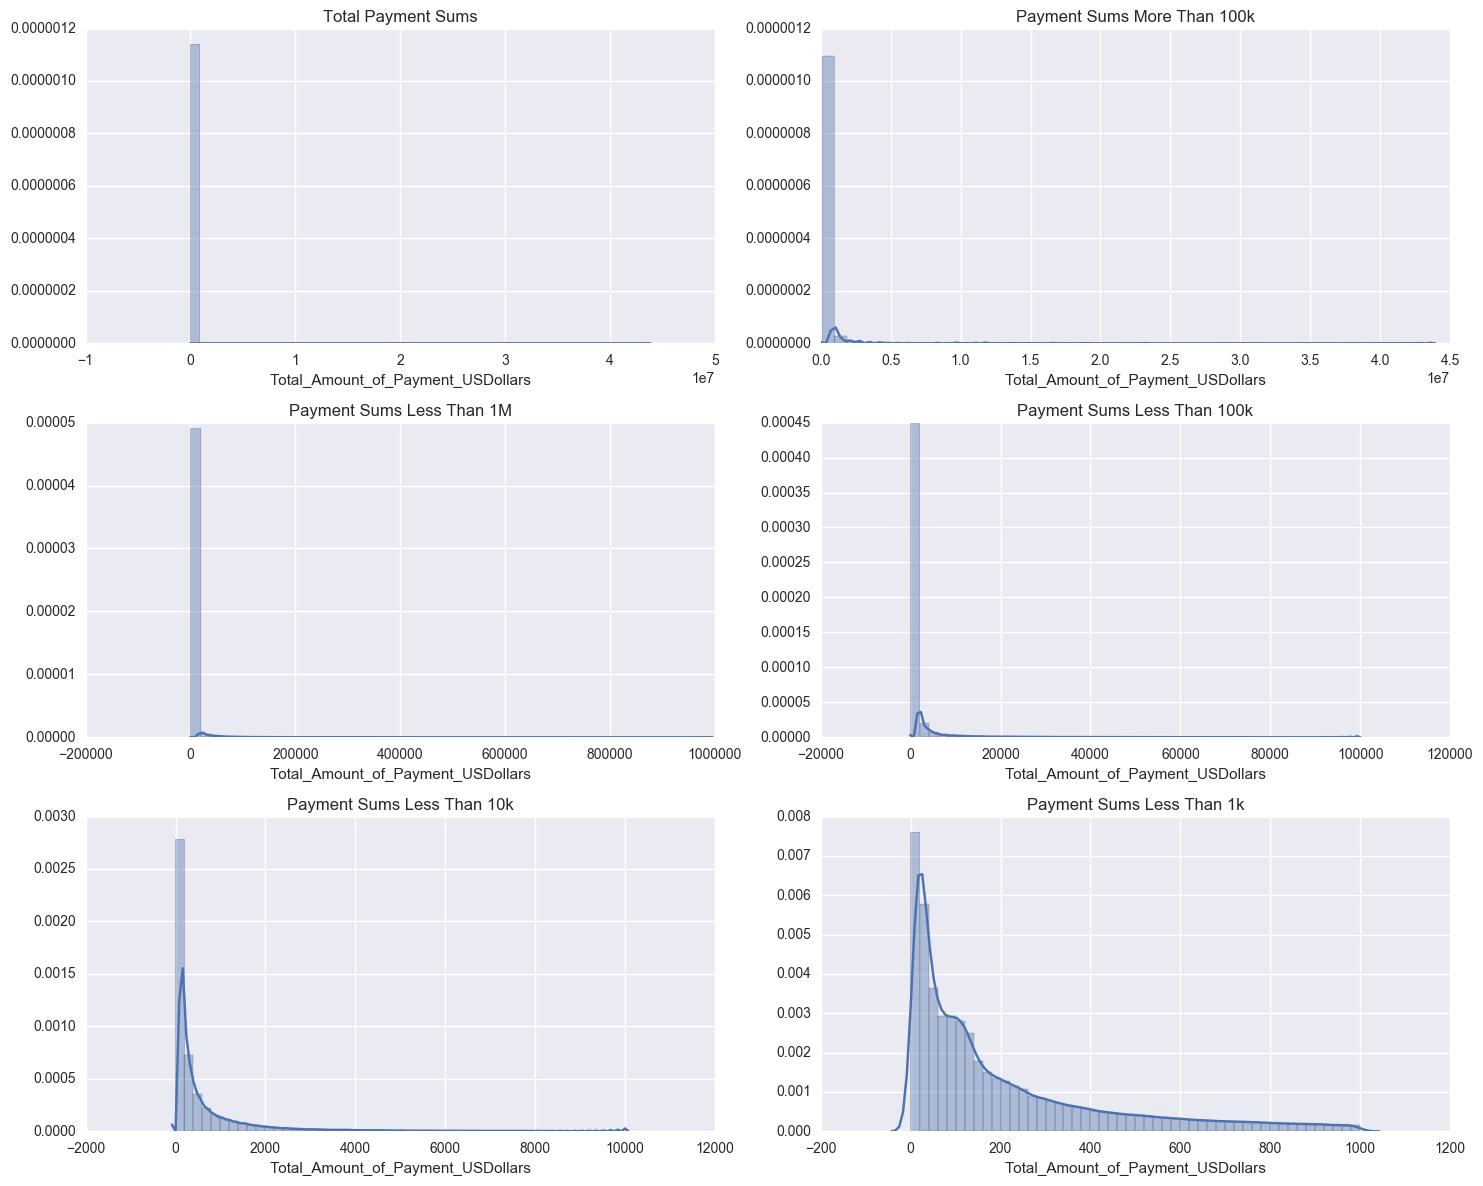

In [56]:
# top_payments.plot(kind='bar')
plt.subplot(3,2,1)
sns.distplot(top_payments.Total_Amount_of_Payment_USDollars)
sns.plt.title('Total Payment Sums')
sns.plt.gcf().set_size_inches(15,12)

plt.subplot(3,2,2)
sns.distplot(top_payments[top_payments.Total_Amount_of_Payment_USDollars > int(1e5)].Total_Amount_of_Payment_USDollars)
sns.plt.title('Payment Sums More Than 100k')

plt.subplot(3,2,3)
sns.distplot(top_payments[top_payments.Total_Amount_of_Payment_USDollars < int(1e6)].Total_Amount_of_Payment_USDollars)
sns.plt.title('Payment Sums Less Than 1M')

plt.subplot(3,2,4)
sns.distplot(top_payments[top_payments.Total_Amount_of_Payment_USDollars < int(1e5)].Total_Amount_of_Payment_USDollars)
sns.plt.title('Payment Sums Less Than 100k')

plt.subplot(3,2,5)
sns.distplot(top_payments[top_payments.Total_Amount_of_Payment_USDollars < int(1e4)].Total_Amount_of_Payment_USDollars)
sns.plt.title('Payment Sums Less Than 10k')

plt.subplot(3,2,6)
sns.distplot(top_payments[top_payments.Total_Amount_of_Payment_USDollars < int(1e3)].Total_Amount_of_Payment_USDollars)
sns.plt.title('Payment Sums Less Than 1k')

plt.tight_layout()

From the above plots we can see that the vast majority of doctor's recieved total payments less than $200 in 2013. But there are some serious outliers.

In [9]:
top_payments.columns = ['total']
top_payments.head(10)

,total
Physician_Profile_ID,
281659,43859981.07
933844,28540871.04
127963,23089522.31
311622,18933939.14
288926,16638590.12
31879,14751156.57
372823,13662596.71
354917,11857477.18
166475,11801124.37


In [10]:
top_earners = top_payments[top_payments.total > int(1e6)]

print("{0} Physicians were paid more than $1 Million in 2013 by drug manufacturers".format(
        len(top_earners)))

118 Physicians were paid more than $1 Million in 2013 by drug manufacturers


In [11]:
df[df.Physician_Profile_ID.isin(top_earners.index)].Form_of_Payment_or_Transfer_of_Value.value_counts()

Cash or cash equivalent                                 3949
In-kind items and services                              2552
Stock, stock option, or any other ownership interest      28
Dividend, profit or other return on investment            20
Name: Form_of_Payment_or_Transfer_of_Value, dtype: int64

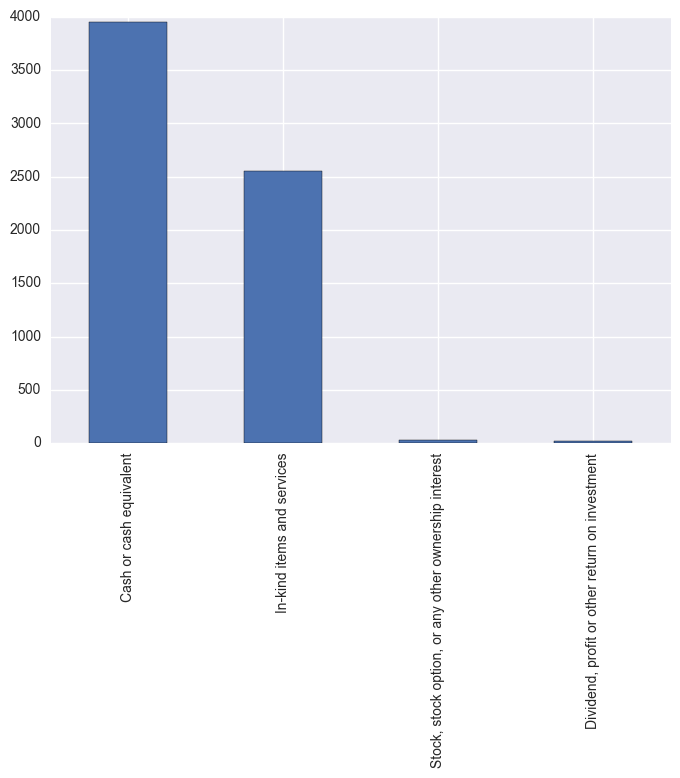

In [12]:
df[df.Physician_Profile_ID.isin(top_earners.index)].Form_of_Payment_or_Transfer_of_Value.value_counts().plot(kind='bar')

Most of the top earners took payments in the form of cash, let's see what the dollar amounts are for each of these categories



In [13]:
df[df.Physician_Profile_ID.isin(top_earners.index)].groupby(
    'Form_of_Payment_or_Transfer_of_Value').agg({'Total_Amount_of_Payment_USDollars': 'sum'})

,Total_Amount_of_Payment_USDollars
Form_of_Payment_or_Transfer_of_Value,
Cash or cash equivalent,3.760006e+08
"Dividend, profit or other return on investment",3.017092e+07
In-kind items and services,4.758264e+06
"Stock, stock option, or any other ownership interest",2.713780e+07


In [14]:
df[df.Physician_Profile_ID.isin(top_earners.index)].groupby(
    'Nature_of_Payment_or_Transfer_of_Value').agg({'Total_Amount_of_Payment_USDollars': 'sum'})

,Total_Amount_of_Payment_USDollars
Nature_of_Payment_or_Transfer_of_Value,
"Compensation for services other than consulting, including serving as faculty or as a speaker at a venue other than a continuing education program",1.466171e+08
Compensation for serving as faculty or as a speaker for a non-accredited and noncertified continuing education program,1.228096e+05
Compensation for serving as faculty or as a speaker for an accredited or certified continuing education program,1.271080e+06
Consulting Fee,6.519745e+06
Current or prospective ownership or investment interest,2.647421e+07
Education,9.235404e+04
Entertainment,3.102600e+02
Food and Beverage,1.379405e+05
Gift,5.752994e+04


So these 33 physicians took home almost 10 Million for 'services' and over 65 Million from royalties and licensing.

The next natural question is what companies paid this money out?

In [15]:
df[df.Physician_Profile_ID.isin(top_earners.index)
                ].Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name.value_counts()[:10]

Stryker Corporation                  763
DePuy Synthes Sales Inc.             598
Smith & Nephew, Inc.                 526
DePuy Orthopaedics Inc.              430
Biomet Orthopedics, LLC              347
Medtronic Sofamor Danek USA, Inc.    280
Tulsa Dental Products LLC            263
DePuy Synthes Products LLC           260
NuVasive, Inc.                       252
Zimmer Holding Inc                   239
Name: Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name, dtype: int64

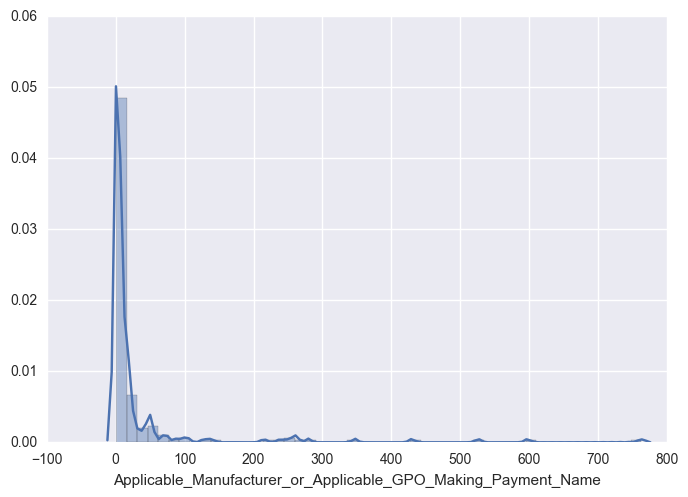

In [16]:
sns.distplot(df[df.Physician_Profile_ID.isin(top_earners.index)
                ].Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name.value_counts())

The manufacturers follow a similar distribution to the sum total of monies paid out. The vast majority of companies here paid less than 20 times, but there are some considerable outliers.

In [17]:
df[df.Physician_Profile_ID.isin(top_earners.index)].groupby(
    'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name').agg(
                                {'Total_Amount_of_Payment_USDollars': 'sum'}).sort_values('Total_Amount_of_Payment_USDollars', ascending=False)

,Total_Amount_of_Payment_USDollars
Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name,
"Topera, Inc.",89054853.16
"Medtronic Sofamor Danek USA, Inc.",49590119.99
DePuy Synthes Products LLC,35255967.74
"St. Jude Medical, Inc.",27338092.73
"Medtronic USA, Inc.",26551312.77
Covidien LP,24530825.13
"Arthrex, Inc.",23604184.05
"Smith & Nephew, Inc.",18096215.20
Stryker Corporation,16497499.14


In [18]:
df[df.Physician_Profile_ID.isin(top_earners.index)].groupby(
    ['Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name','Nature_of_Payment_or_Transfer_of_Value']).agg(
                                {'Total_Amount_of_Payment_USDollars': 'sum'}).sort_values('Total_Amount_of_Payment_USDollars', ascending=False)

,,Total_Amount_of_Payment_USDollars
Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name,Nature_of_Payment_or_Transfer_of_Value,
"Topera, Inc.","Compensation for services other than consulting, including serving as faculty or as a speaker at a venue other than a continuing education program",89041019.40
"Medtronic Sofamor Danek USA, Inc.",Royalty or License,49418474.00
DePuy Synthes Products LLC,Royalty or License,35240471.74
"St. Jude Medical, Inc.","Compensation for services other than consulting, including serving as faculty or as a speaker at a venue other than a continuing education program",27337733.21
"Medtronic USA, Inc.",Royalty or License,26550000.00
"Arthrex, Inc.",Royalty or License,23327615.64
Covidien LP,"Compensation for services other than consulting, including serving as faculty or as a speaker at a venue other than a continuing education program",22980722.08
"Smith & Nephew, Inc.",Royalty or License,17730096.53
Stryker Corporation,Royalty or License,15969002.38


# How do these trend over the year?

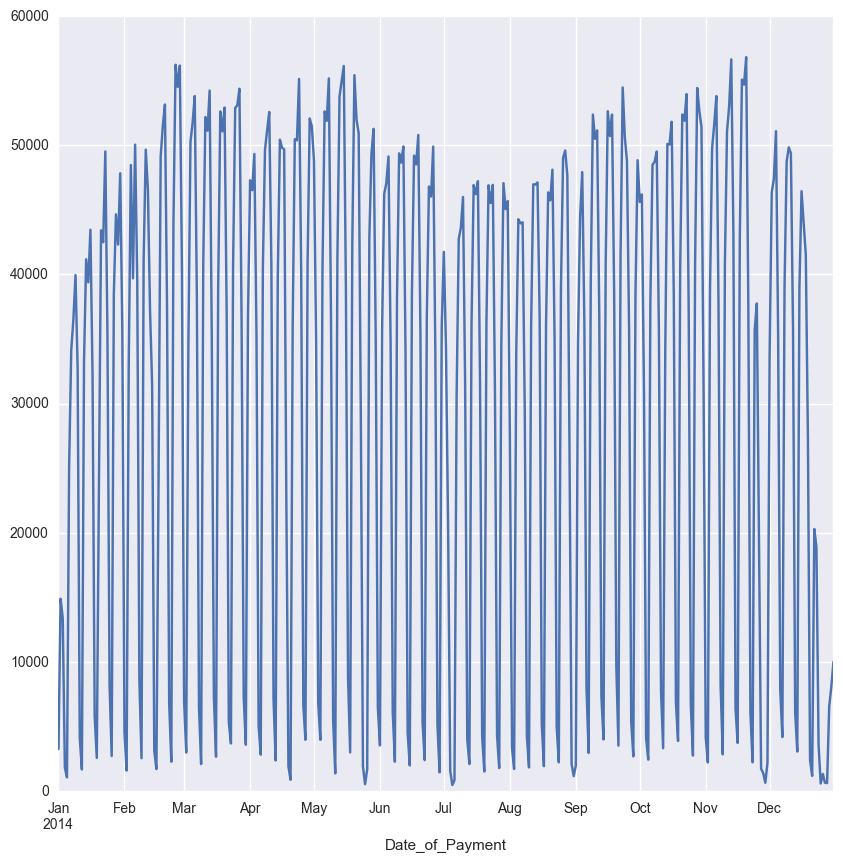

In [19]:
df.groupby('Date_of_Payment').count()['Change_Type'].plot(figsize=(10,10))

The payments appear cyclical, likely to be larger on the weekdays and not many on the weekends.

Also there seems to only be payment data from August onward, so this only counts less than half of 2013

In [20]:
df['day_of_week'] = df.Date_of_Payment.dt.weekday_name


grouped = df.groupby('day_of_week').count()
grouped.index = pd.CategoricalIndex(grouped.index, 
                                    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])

grouped
                                                    

,Change_Type,Covered_Recipient_Type,Teaching_Hospital_CCN,Teaching_Hospital_ID,Teaching_Hospital_Name,Physician_Profile_ID,Physician_First_Name,Physician_Middle_Name,Physician_Last_Name,Physician_Name_Suffix,...,NDC_of_Associated_Covered_Drug_or_Biological3,NDC_of_Associated_Covered_Drug_or_Biological4,NDC_of_Associated_Covered_Drug_or_Biological5,Name_of_Associated_Covered_Device_or_Medical_Supply1,Name_of_Associated_Covered_Device_or_Medical_Supply2,Name_of_Associated_Covered_Device_or_Medical_Supply3,Name_of_Associated_Covered_Device_or_Medical_Supply4,Name_of_Associated_Covered_Device_or_Medical_Supply5,Program_Year,Payment_Publication_Date
Friday,1688786,1688786,7413,7413,7413,1681373,1681362,868890,1681342,33788,...,100047,11751,5033,332998,24839,6185,2055,1109,1688786,1688786
Monday,1815195,1815195,7658,7658,7658,1807537,1807537,939871,1807493,37736,...,121184,14836,5649,246395,17736,6068,2330,1366,1815195,1815195
Saturday,278696,278696,1182,1182,1182,277514,277514,131164,277512,5600,...,5279,799,556,109964,8545,2903,1427,797,278696,278696
Sunday,124755,124755,590,590,590,124165,124164,58099,124161,3564,...,3398,616,356,50726,4425,1947,1115,287,124755,124755
Thursday,2434593,2434593,9970,9970,9970,2424623,2424618,1257812,2424583,50094,...,139171,17514,6779,426662,31733,8232,3407,2055,2434593,2434593
Tuesday,2443857,2443857,9214,9214,9214,2434643,2434641,1262820,2434579,49970,...,153166,18435,7629,381262,23777,8063,3194,1996,2443857,2443857
Wednesday,2391085,2391085,16134,16134,16134,2374951,2374947,1219578,2374914,47151,...,140200,17085,7033,397191,25769,7089,2861,1970,2391085,2391085


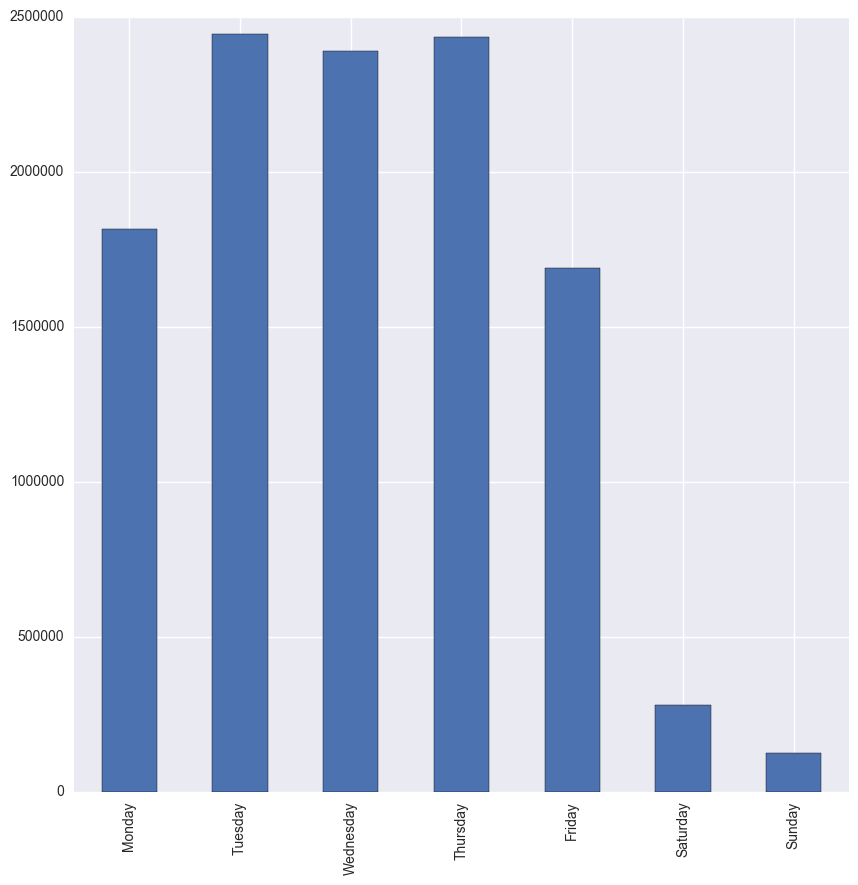

In [21]:
grouped.sort()['Change_Type'].plot(kind='bar', figsize=(10,10))

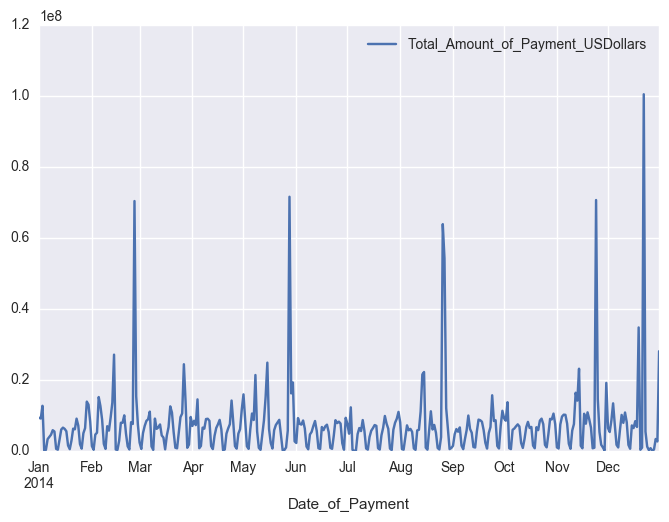

In [22]:
df.groupby('Date_of_Payment').agg({'Total_Amount_of_Payment_USDollars': 'sum'}).plot()

In [23]:
df.groupby('Date_of_Payment').agg({'Total_Amount_of_Payment_USDollars': 'sum'}
                                 ).sort_values('Total_Amount_of_Payment_USDollars', ascending=False)

,Total_Amount_of_Payment_USDollars
Date_of_Payment,
2014-12-22,1.004707e+08
2014-05-28,7.160998e+07
2014-11-24,7.068778e+07
2014-02-26,7.040165e+07
2014-08-26,6.390321e+07
2014-08-27,5.425539e+07
2014-12-19,3.481557e+07
2014-12-31,2.812875e+07
2014-02-14,2.715820e+07


Large spikes on November 21st and August 27th

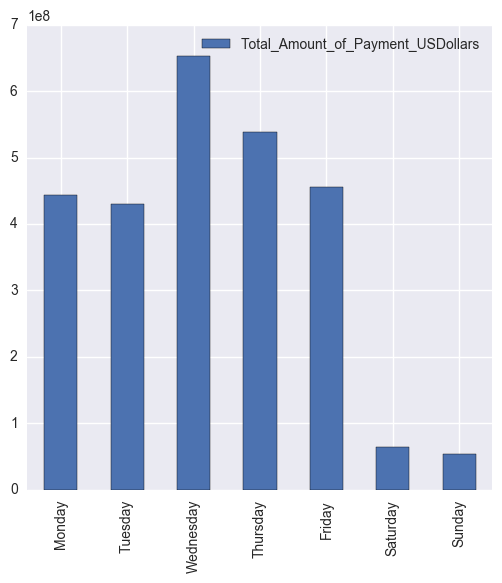

In [24]:
grouped = df.groupby('day_of_week').agg({'Total_Amount_of_Payment_USDollars': 'sum'})
grouped.index = pd.CategoricalIndex(grouped.index, 
                                    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])


grouped.sort().plot(kind='bar', figsize=(6,6))
               

In [25]:
nature_of_payments = df.Nature_of_Payment_or_Transfer_of_Value.value_counts(normalize=True).to_frame()

In [26]:
nature_of_payments.columns = ['Fraction of payments']

In [27]:
nature_of_payments

,Fraction of payments
Food and Beverage,0.865412
Travel and Lodging,0.048806
Education,0.037266
"Compensation for services other than consulting, including serving as faculty or as a speaker at a venue other than a continuing education program",0.021406
Consulting Fee,0.011740
Gift,0.006983
Honoraria,0.003216
Royalty or License,0.001300
Compensation for serving as faculty or as a speaker for a non-accredited and noncertified continuing education program,0.000891
Space rental or facility fees(teaching hospital only),0.000794


In [28]:
index_reset = nature_of_payments.reset_index()

In [29]:
index_reset

,index,Fraction of payments
0,Food and Beverage,0.865412
1,Travel and Lodging,0.048806
2,Education,0.037266
3,Compensation for services other than consultin...,0.021406
4,Consulting Fee,0.011740
5,Gift,0.006983
6,Honoraria,0.003216
7,Royalty or License,0.001300
8,Compensation for serving as faculty or as a sp...,0.000891
9,Space rental or facility fees(teaching hospita...,0.000794


In [30]:
index_reset['index'][9] = 'Speaking or serving as a faculty for a non-accredited program'

In [31]:
index_reset['index'][3] = 'Compensation for services other than consulting'
index_reset['index'][13] = 'Speaking or serving as a faculty for an accredited program'

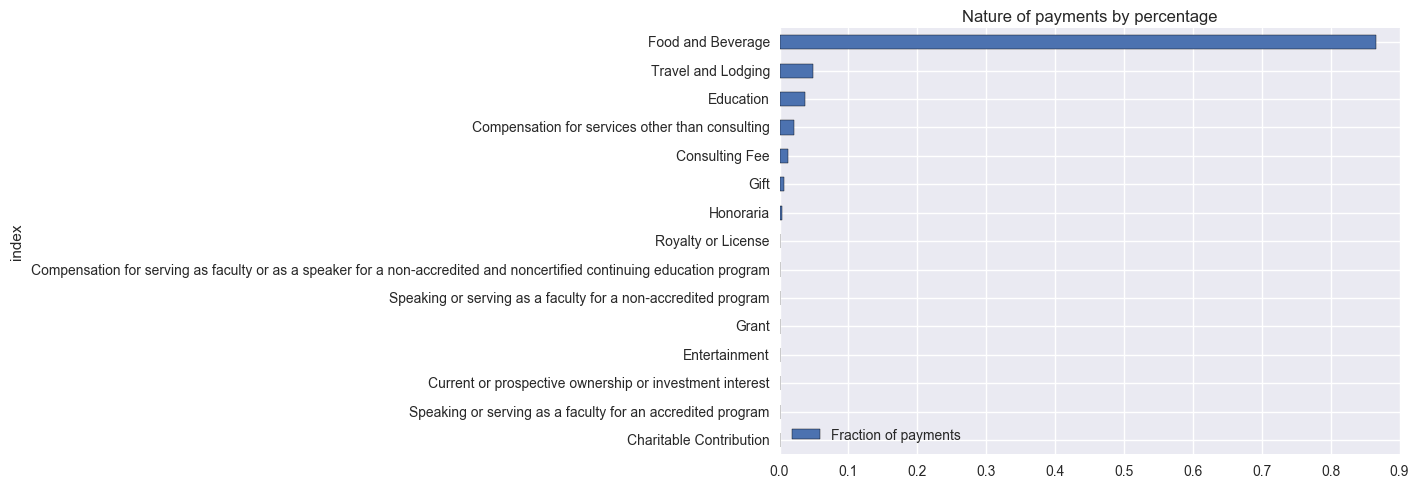

In [32]:
index_reset.set_index('index').sort_values('Fraction of payments').plot(kind='barh', title='Nature of payments by percentage')
None

In [43]:
sum_nature_of_pay = df.groupby('Nature_of_Payment_or_Transfer_of_Value').agg({'Total_Amount_of_Payment_USDollars': 'sum'})

In [45]:
sum_index_reset = sum_nature_of_pay.reset_index()

In [46]:
sum_index_reset

,Nature_of_Payment_or_Transfer_of_Value,Total_Amount_of_Payment_USDollars
0,Charitable Contribution,1.015950e+07
1,Compensation for services other than consultin...,6.219578e+08
2,Compensation for serving as faculty or as a sp...,2.326295e+07
3,Compensation for serving as faculty or as a sp...,8.179407e+06
4,Consulting Fee,3.859675e+08
5,Current or prospective ownership or investment...,5.343523e+07
6,Education,7.014603e+07
7,Entertainment,4.778954e+05
8,Food and Beverage,2.331910e+08
9,Gift,3.025807e+07


In [49]:
sum_index_reset['Nature_of_Payment_or_Transfer_of_Value'][3]

'Compensation for serving as faculty or as a speaker for an accredited or certified continuing education program'

In [50]:
sum_index_reset['Nature_of_Payment_or_Transfer_of_Value'][2] = 'Speaking or serving as a faculty for a non-accredited program'
sum_index_reset['Nature_of_Payment_or_Transfer_of_Value'][1] = 'Compensation for services other than consulting'
sum_index_reset['Nature_of_Payment_or_Transfer_of_Value'][3] = 'Speaking or serving as a faculty for an accredited program'

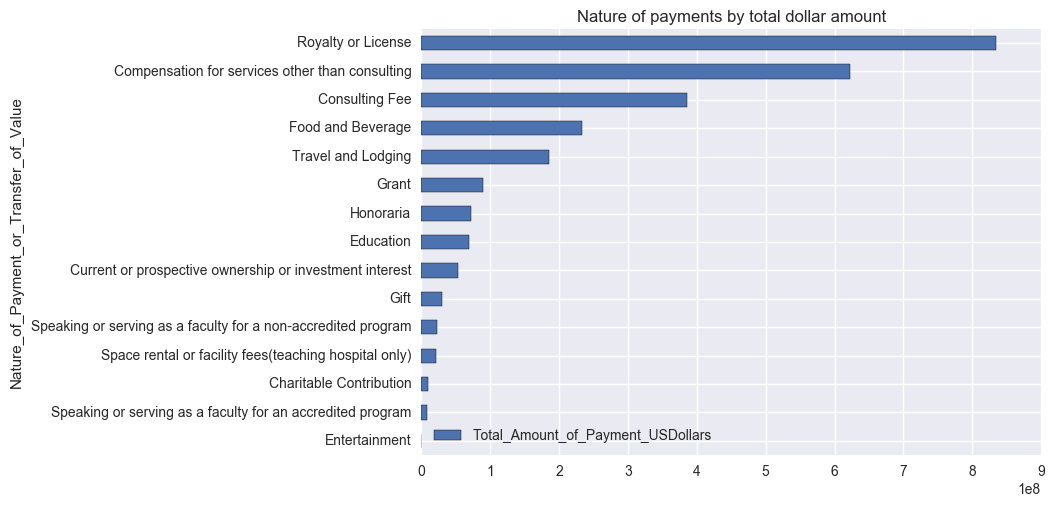

In [52]:
sum_index_reset.set_index('Nature_of_Payment_or_Transfer_of_Value').sort_values('Total_Amount_of_Payment_USDollars').plot(kind='barh', title='Nature of payments by total dollar amount')
None

In [34]:
"{:,}".format(df['Total_Amount_of_Payment_USDollars'].sum())

'2,639,829,906.952142'

In [37]:
"{:,}".format(len(df))

'11,176,967'

In [40]:
"{:,}".format(len(df.Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name.value_counts()))

'1,532'

In [41]:
"{:,}".format(len(df.Physician_Profile_ID.value_counts()))

'616,416'

In [ ]:
df[['Physician_Profile_ID',
    'Total_Amount_of_Payment_USDollars',
    'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name']].head()

In [38]:
df[(df.Physician_Profile_ID.notnull()) & (df.Teaching_Hospital_ID.notnull())]

,Change_Type,Covered_Recipient_Type,Teaching_Hospital_CCN,Teaching_Hospital_ID,Teaching_Hospital_Name,Physician_Profile_ID,Physician_First_Name,Physician_Middle_Name,Physician_Last_Name,Physician_Name_Suffix,...,NDC_of_Associated_Covered_Drug_or_Biological4,NDC_of_Associated_Covered_Drug_or_Biological5,Name_of_Associated_Covered_Device_or_Medical_Supply1,Name_of_Associated_Covered_Device_or_Medical_Supply2,Name_of_Associated_Covered_Device_or_Medical_Supply3,Name_of_Associated_Covered_Device_or_Medical_Supply4,Name_of_Associated_Covered_Device_or_Medical_Supply5,Program_Year,Payment_Publication_Date,day_of_week
